Group Members:  Youjun Chen, Yuriko Sanno, Zhiyuan Ren

# Group contribution statement: 
Youjun worked on the figures for exploratory data analysis, feature selection, as well as the decision trees model. Yuriko worked on the table for exploratory data analysis as well the SVC model. Zhiyuan worked on the feature selection as well as the multinomial logistic regression model. We all worked together to improve each others’ codes as well as write-up. 


# Project Summary: 
For our project, we attempted to find what would be the best combination of predictor variables to predict Species from the Penguin dataset. We first created various figures/tables to understand the overall structure of the dataset and hypothesized on potential combinations of variables. Then, we conducted feature selection with combinations for 2,3 and 4 variables and narrowed down to 2 predictor variables: Culmen length (mm) and Culmen Depth (mm). We ensured that these variables predicted Species successfully by testing on 3 different models: multinomial logistic regression, decision tree and SVC. We found that our selected variables consistently produced test scores of 0.90 or above for all three models. 




In [1]:
# required libraries
import pandas as pd
import numpy as np
import urllib
import random
from matplotlib import pyplot as plt

In [2]:
np.random.seed(1234) #fix the randomness

# Exploratory Data Analysis

### Load the data

In [3]:
# download the data
url = "https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv"
filedata = urllib.request.urlopen(url)
to_write = filedata.read()

with open("palmer_penguins.csv", "wb") as f:
    f.write(to_write)

In [4]:
penguins = pd.read_csv("palmer_penguins.csv") # read data to pandas data frame
penguins.head(3)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN


In this dataset, there are 8 variables we could potentially use to protect species. 
- 2 qualitative variables: "Sex", "Island"
- 6 quantitative variables: "Flipper Length (mm)", "Body Mass (g)", "Culmen Length (mm)", "Culmen Depth (mm)", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"

In [5]:
# shorten the species name
penguins["Species"] = penguins["Species"].str.split().str.get(0)

In [6]:
def penguin_summary_table(group_cols, value_cols):
    '''generates means for given variables
    
    group_cols: list, the group we want to look at
    value_cols: list, the values we want to look at for each group
    '''
    my_data = penguins.groupby(group_cols)[value_cols].mean()
    return my_data.round(2)

In order to first understand the overall structure as well as the general trend of each variable, we created a table that computes the mean score of all quantitative variables for each species.

In [7]:
penguin_summary_table(["Species"], ["Flipper Length (mm)", "Body Mass (g)", "Culmen Length (mm)", "Culmen Depth (mm)", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"])

,Flipper Length (mm),Body Mass (g),Culmen Length (mm),Culmen Depth (mm),Delta 15 N (o/oo),Delta 13 C (o/oo)
Species,,,,,,
Adelie,189.95,3700.66,38.79,18.35,8.86,-25.80
Chinstrap,195.82,3733.09,48.83,18.42,9.36,-24.55
Gentoo,217.19,5076.02,47.50,14.98,8.25,-26.19


We notice that Flipper Length (mm),	Body Mass (g),	Culmen Length (mm), and	Culmen Depth (mm) all have at least certain species that stands out from the rest. These variables could potentially help us to distinguish species so we looked further these variables using scatter plots.

First, we looked at "Culmen Length (mm)" and "Culmen Depth (mm)". 

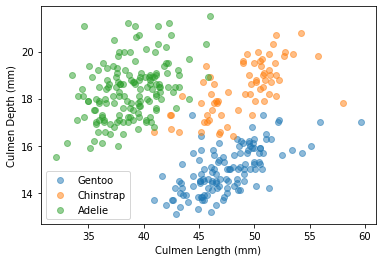

In [8]:
fig, ax = plt.subplots(1)
ax.set(xlabel = "Culmen Length (mm)", ylabel = "Culmen Depth (mm)")

for species in set(penguins.Species):
    one_species = penguins[penguins.Species == species]
    ax.scatter(one_species["Culmen Length (mm)"],one_species["Culmen Depth (mm)"], label = species, alpha = 0.5)
                                                
ax.legend()
plt.show()

For Culmen Length, we can distinguish Gentoo and Adelie well except for those in 40-45mm region; however, there is a significant overlap with Gentoo and Chinstrap. On the other hand, Culmen Length distinguishes Adelie and Gentoo well but there is an overlap between Chinstrap and Adelie. From this graph, we can see each variable alone is not sufficient to predict species, however, they may make a good set of predictor variables when combined together. 

We then looked at "Body Mass (g)" and "Flipper Length (mm)".

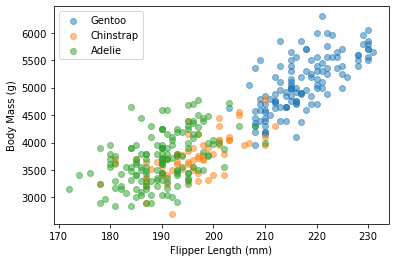

In [9]:
fig, ax = plt.subplots(1)
ax.set(xlabel = "Flipper Length (mm)", ylabel = "Body Mass (g)")

for species in set(penguins.Species):
    one_species = penguins[penguins.Species == species]
    ax.scatter(one_species["Flipper Length (mm)"],one_species["Body Mass (g)"], label = species, alpha = 0.5)
                                                
ax.legend()
plt.show()

Flipper Length distinguishes Gentoo and Adelie well; however, there is a significant overlap with Adelie and Chinstrap. 
Body Mass distingushes Gentoo and Adelie, though there is a bit of overlap in 4000-5000g region. For Adelie and Chinstrap, the body mass also fails to distinguish the two as threre is a significant overlap. 

We also looked at "Delta 15 N (o/oo)" and "Delta 13 C (o/oo)".

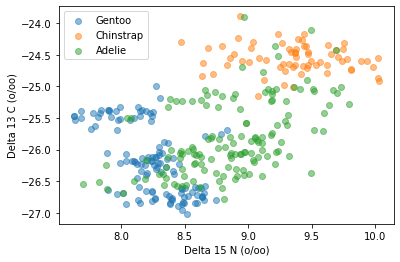

In [10]:
fig, ax = plt.subplots(1)
ax.set(xlabel = "Delta 15 N (o/oo)", ylabel = "Delta 13 C (o/oo)")

for species in set(penguins.Species):
    one_species = penguins[penguins.Species == species]
    ax.scatter(one_species["Delta 15 N (o/oo)"],one_species["Delta 13 C (o/oo)"], label = species, alpha = 0.5)
                                                
ax.legend()
plt.show()

As we hypothesized from the table, it is difficult to distinguish species from these variables. For both Delata 13C and 15N, Adelie penguin have a wide range of value. This makes it difficult to distinguish Adelie from the other two species in both Delta 15N and Delta 13C. Because of this, these two variables may not be ideal predictor variables. 

From these figures we think that we hypothesized "Culmen Length (mm)", "Culmen Depth (mm)" and potentially "Flipper Length (mm)", "Body Mass (g)" could be the optimal predictive variables.

# Modeling
In this section, we conducted feature selection to test our hypothesis.

In [11]:
#Select predictor features and remove NAN rows
penguins = penguins[["Species","Flipper Length (mm)", 
                     "Body Mass (g)", "Culmen Length (mm)", 
                     "Culmen Depth (mm)", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)","Sex","Island"]].dropna()

### Split the data into training and test sets

In [12]:
from sklearn.model_selection import train_test_split
# hold out 20% of the data for testing
train, test = train_test_split(penguins, test_size = 0.2) 

# holds predictor variables
X_train = train[["Flipper Length (mm)", 
                     "Body Mass (g)", "Culmen Length (mm)", 
                     "Culmen Depth (mm)", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)", "Sex","Island"]]  

# holds target variable
y_train = train[["Species"]]

# holds predictor variables
X_test = test[["Flipper Length (mm)", 
                     "Body Mass (g)", "Culmen Length (mm)", 
                     "Culmen Depth (mm)", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)","Sex","Island"]] 

# holds target variable
y_test = test[["Species"]]

### Clean the data
We encoded the sex and the species of the penguins as integers

In [13]:
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Create a function to clean data
def prep_data(X, y):
    '''
    encodes qualitative variables in a given dataset to numeric values
    
    X: dataframe, predictor variables
    y: dataframe, target variable
    '''
    
    # First make copies of X and y
    X = X.copy() 
    y = y.copy()
    
    le = preprocessing.LabelEncoder()
    
    X['Sex'] = le.fit_transform(X['Sex']) # encode 'Sex' into 0 and 1
    X['Island'] = le.fit_transform(X['Island']) # encode 'Island' into numeric values
    
    y['Species'] = le.fit_transform(y['Species']) # encode 'Species' into numeric values
   
    return (X, y)

# Clean the data
X_train, y_train = prep_data(X_train, y_train) 
X_test, y_test = prep_data(X_test, y_test)


## Feature Selection

We conducted feature selection to select the best combinations of variables. We used multinominal logistic regression as our model.

In [14]:
from sklearn.linear_model import LogisticRegression
def check_column_score(cols):
    '''
    returns the mean of cross validation score for the logistic regression model
    cols: list, name of the predictor variables
    
    '''
    LR = LogisticRegression(multi_class='multinomial',max_iter = 1000) # initiate the model
    return cross_val_score(LR, X_train[cols], np.ravel(y_train), cv = 5).mean()  

In [15]:
from itertools import combinations 
# generate the combination of features
m = ["Flipper Length (mm)", 
                     "Body Mass (g)", "Culmen Length (mm)", 
                     "Culmen Depth (mm)", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)","Sex","Island"]


combos_2 = combinations(m, 2) # make combos of 2 features
combos_3 = combinations(m, 3) # make combos of 3 features

In [16]:
# find the best combination of 2 features
best_score = 0
best_combo = []
# Print the obtained combinations 
for cols in list(combos_2): 
    x = check_column_score(list(cols))
    if x > best_score:
        best_score = x
        best_combo = cols
        
print(best_combo,best_score)

('Culmen Length (mm)', 'Island') 0.9615384615384617


In [17]:
# find the best combination of 3 features
for cols in list(combos_3): 
    x = check_column_score(list(cols))
    #print(cols, x)
    if x > best_score:
        best_score = x
        best_combo = cols
        
print(best_combo,best_score)

('Body Mass (g)', 'Culmen Length (mm)', 'Culmen Depth (mm)') 0.9961538461538462


Here we found that using three features ('Body Mass (g)', 'Culmen Length (mm)', 'Culmen Depth (mm)') yield highest cv score. So we decided to use these variables for our models.

In [18]:
# finalize predictor variables
X_train = train[['Body Mass (g)', 'Culmen Length (mm)', 'Culmen Depth (mm)']] 
X_test = test[['Body Mass (g)', 'Culmen Length (mm)', 'Culmen Depth (mm)']]

## 1) Multinomial logistic regression
Multinomial logistic model in this case generates a function of linear combinations of predictor variables into three dimentional space. Based on the function, it allocate the data points to respective decision regions.

Best C:  1.5
Best score:  0.9961538461538462


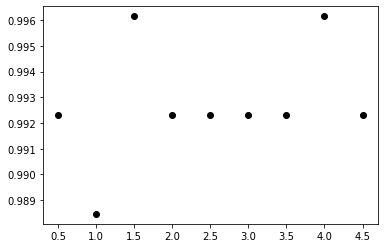

In [19]:
best_comp = 0
bestlr_score = 0
fig, ax = plt.subplots(1)

for c in np.arange(0.5, 5, 0.5): # find optimal parameter
    MLR = LogisticRegression(multi_class='multinomial',max_iter = 1000, C = c)
    cv_score = cross_val_score(MLR, X_train, np.ravel(y_train), cv=10).mean()
    ax.scatter(c, cv_score, color = "black") # plot cv score for each c
    
    # stores the best model
    if cv_score > bestlr_score:
        best_comp = c 
        bestlr_score = cv_score
        M = MLR
    

print("Best C: ", best_comp)
print("Best score: ", bestlr_score)

In [20]:
M.fit(X_train, np.ravel(y_train))
print('Test score: ', M.score(X_test, y_test))

Test score:  0.9846153846153847


In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

def plot_confusion_matrix_(Model,X_test, y_test):
    '''
    create and visualize confusion matrix
    Model: model
    X_test: dataframe, predictor variables
    y_test: dataframe, target variable
    '''
    species_codes =  ['Adelie','Chinstrap','Gentoo']
    y_test_pred = Model.predict(X_test)
    c = confusion_matrix(y_test, y_test_pred)
    #visualize confusion matrix 
    disp = plot_confusion_matrix(Model, X_test, y_test,
                                 display_labels= species_codes,
                                 cmap = plt.cm.Blues) 


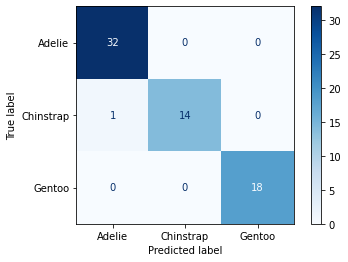

In [22]:
plot_confusion_matrix_(M,X_test, y_test)

In [23]:
y_test_pred = M.predict(X_test)
Y_test = y_test.copy() #make a copy of y_test dataframe
Y_test['Species_pred']= y_test_pred
Y_test[(Y_test["Species"] == 1) & (Y_test['Species_pred'] == 0)]

,Species,Species_pred
160,1,0


In [24]:
penguins.loc[160]

Species                Chinstrap
Flipper Length (mm)          195
Body Mass (g)               4150
Culmen Length (mm)            46
Culmen Depth (mm)           18.9
Delta 15 N (o/oo)        8.47173
Delta 13 C (o/oo)       -24.2923
Sex                       FEMALE
Island                     Dream
Name: 160, dtype: object

This one was mistaken for Adelie, but it is Chinstrap. When we look at our figures, we can see that many penguins from both species have 4150 gram body mass. This means that our model need to distinguish the two using either the culmen length or the culmen depth. However, this penguin's culmen length and culmen depth fall right in the middle of both species' range. This ambiguity may have led to this mistake.

## 2) Decision Trees
The decision tree model uses the predictor data to generate decision rules constructed by a series of “if-else'' conditions.  The rules are then used to predict the label (“Species”).

Best depth:  27
Best score:  0.9615384615384617


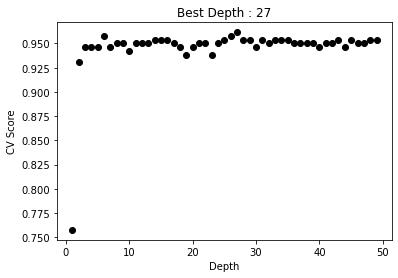

In [25]:
from sklearn import tree
fig, ax = plt.subplots(1)
best_score = 0

for d in range(1,50): # find optimal parameter
    Tree = tree.DecisionTreeClassifier(max_depth = d)
    cv_score = cross_val_score(Tree, X_train, y_train, cv=10).mean()
    ax.scatter(d, cv_score, color = "black") # plot depth for each model
    
    
    # store the best model
    if cv_score > best_score:
        best_depth = d
        best_score = cv_score
        T = Tree

l = ax.set(title = "Best Depth : " + str(best_depth),
       xlabel = "Depth", 
       ylabel = "CV Score")


print("Best depth: ", best_depth)
print("Best score: ", best_score)

In [26]:
T.fit(X_train, y_train)
print('Test score: ', T.score(X_test, np.ravel(y_test)))

Test score:  0.9538461538461539


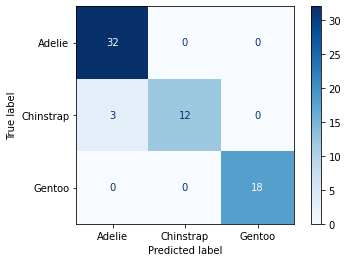

In [27]:
plot_confusion_matrix_(T,X_test, y_test)

In [28]:
y_test_pred = T.predict(X_test)
Y_test = y_test.copy() #make a copy of y_test dataframe
Y_test['Species_pred']= y_test_pred
Y_test[(Y_test["Species"] == 1) & (Y_test['Species_pred'] == 0)]

,Species,Species_pred
160,1,0


In [29]:
penguins.loc[216]

Species                Chinstrap
Flipper Length (mm)          202
Body Mass (g)               3400
Culmen Length (mm)          43.5
Culmen Depth (mm)           18.1
Delta 15 N (o/oo)        9.37608
Delta 13 C (o/oo)       -24.4075
Sex                       FEMALE
Island                     Dream
Name: 216, dtype: object

In [30]:
penguins.loc[206]

Species                Chinstrap
Flipper Length (mm)          187
Body Mass (g)               3350
Culmen Length (mm)          42.5
Culmen Depth (mm)           17.3
Delta 15 N (o/oo)        9.56534
Delta 13 C (o/oo)       -24.6088
Sex                       FEMALE
Island                     Dream
Name: 206, dtype: object

There are three mistakes made by decision tree model. Again the three Chinstrap penguins' body mass overlap completely with Adelie. Similarly, the three species'culmen length and culmen depth fall right in the middle of both species' range. 

## 3) Support Vector Machine
The SVM model plots each data item as a point in n-dimensional space (in our case, 3-dimensional space). Then it performs classification by finding the hyper-plane that differentiates different classes.

In [ ]:
from sklearn import svm
fig, ax = plt.subplots(1)
best_score = 0

#estimate optimal value 
for g in np.arange(0.05, 0.1, 0.0005):  # find optimal parameter
    SVC = svm.SVC(kernel = 'linear', gamma = g).fit(X_train, np.ravel(y_train))
    cv_score = cross_val_score(SVC, X_train, np.ravel(y_train), cv=10).mean() #take out 20% for cross val score 
    ax.scatter(g, cv_score, color = "black")
    
    # store the best model
    if cv_score > best_score: #if new cv score is higher than best score, replace that as the new value 
        best_g = g
        best_score = cv_score
        S = SVC
        
print("Best gamma value: ", best_g)        
print("Best score: ", best_score)

In [ ]:
S.fit(X_train, np.ravel(y_train))
print('Test score: ', S.score(X_test, np.ravel(y_test)))

In [ ]:
plot_confusion_matrix_(S,X_test, y_test)

In [ ]:
y_test_pred = S.predict(X_test)
Y_test = y_test.copy() #make a copy of y_test dataframe
Y_test['Species_pred']= y_test_pred
Y_test[(Y_test["Species"] == 1) & (Y_test['Species_pred'] == 0)]

SVC made the same mistake as MLR model. We expect the same reason here.

## Discussion

Overall our models predicted the target variable well, which suggests that our selected predicted variables were efficient. All of our models made mistakes between the same species: Adelie and Chinstrap. Specifically, Chinstrap was mistaken for Adelie. When looking at our figures, there are potential reasons that contribute this mistake. First, for body mass, there is a significant overlap for Adelie and Chinstrap. Moreover, while most data points were clearly segregated, there were still some ambigurities for culmen length/depth's boundries. However, different models yielded slightly different results; specificly our mlr and svc models only made one mistake while decision tree model made three mistakes. This may be due to the fact that decision tree model works on series of if-else conditions. Since the boundries were more concrete, it may not have caught subtle nuance the other models have. Since the other two models works on functions to create decision regions, they are more flexible.

Overall, we suggest to use either SVC model or MLR model with Body Mass, Culmen Length, Culmen Depth with predictor variables. We can improve our models by performing grid searches on more parameters for each model. However, the more parameters we tried to tune, the longer it takes to excute.